In [8]:
import pandas as pd

data = pd.read_csv('updated_file.csv')

In [9]:
data = data[data['track'] == 'Brazil']


data.head(10)


,Driver,DriverNumber,FormattedLapTime,LapNumber,Stint,TyreLife,Compound,Team,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,track
5686,GAS,10,1:14:873,2.0,1.0,5.0,SOFT,Toro Rosso,20.4,62.9,925.1,False,48.0,104,1.3,Brazil
5687,GAS,10,1:14:212,3.0,1.0,6.0,SOFT,Toro Rosso,20.7,61.9,925.1,False,48.8,210,0.5,Brazil
5688,GAS,10,1:14:617,4.0,1.0,7.0,SOFT,Toro Rosso,21.0,60.9,925.0,False,49.4,205,1.5,Brazil
5689,GAS,10,1:14:372,5.0,1.0,8.0,SOFT,Toro Rosso,21.1,60.4,925.0,False,49.6,149,1.2,Brazil
5690,GAS,10,1:14:785,6.0,1.0,9.0,SOFT,Toro Rosso,21.1,59.8,925.1,False,49.6,98,1.3,Brazil
5691,GAS,10,1:14:939,7.0,1.0,10.0,SOFT,Toro Rosso,20.9,60.5,925.1,False,48.9,131,1.2,Brazil
5692,GAS,10,1:14:800,8.0,1.0,11.0,SOFT,Toro Rosso,21.2,60.3,924.9,False,49.5,148,1.5,Brazil
5693,GAS,10,1:14:983,9.0,1.0,12.0,SOFT,Toro Rosso,21.2,60.1,925.0,False,48.5,0,1.2,Brazil
5694,GAS,10,1:15:840,10.0,1.0,13.0,SOFT,Toro Rosso,21.2,60.1,924.9,False,48.1,192,0.8,Brazil
5695,GAS,10,1:15:199,11.0,1.0,14.0,SOFT,Toro Rosso,21.1,60.5,924.9,False,46.8,157,1.1,Brazil


In [10]:
import pandas as pd


data = pd.DataFrame(data)

# Encode the Compound column (SOFT = 1, MEDIUM = 2, HARD = 3)
data['Compound'] = data['Compound'].replace({'SOFT': 3, 'MEDIUM': 2, 'HARD': 1, 'INTERMEDIATE': 4, 'WET': 5})

# Filter the DataFrame to drop rows where Compound is INTERMEDIATE (4) or WET (5)
data = data[~data['Compound'].isin([4, 5])]

# Display the updated DataFrame with the filtered rows
print(data[['Compound']].head(10))



      Compound
5686         3
5687         3
5688         3
5689         3
5690         3
5691         3
5692         3
5693         3
5694         3
5695         3


<ipython-input-10-02125ac7b6e0>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Compound'] = data['Compound'].replace({'SOFT': 3, 'MEDIUM': 2, 'HARD': 1, 'INTERMEDIATE': 4, 'WET': 5})


In [11]:
import pandas as pd





# Function to convert FormattedLapTime into seconds
def convert_lap_time_to_seconds(lap_time):
    minutes, seconds, milliseconds = lap_time.split(':')
    total_seconds = int(minutes) * 60 + int(seconds) + int(milliseconds) / 1000
    return total_seconds

# Apply the conversion to the 'FormattedLapTime' column
data['LapTimeInSeconds'] = data['FormattedLapTime'].apply(convert_lap_time_to_seconds)

# Display the result
print(data[['FormattedLapTime', 'LapTimeInSeconds']])


     FormattedLapTime  LapTimeInSeconds
5686         1:14:873            74.873
5687         1:14:212            74.212
5688         1:14:617            74.617
5689         1:14:372            74.372
5690         1:14:785            74.785
...               ...               ...
9812         1:16:232            76.232
9813         1:16:639            76.639
9814         1:17:406            77.406
9815         1:16:914            76.914
9816         1:16:767            76.767

[4131 rows x 2 columns]


In [12]:
import pandas as pd



df = pd.DataFrame(data)

# Function to convert FormattedLapTime into seconds
def convert_lap_time_to_seconds(lap_time):
    minutes, seconds, milliseconds = lap_time.split(':')
    total_seconds = int(minutes) * 60 + int(seconds) + int(milliseconds) / 1000
    return total_seconds

# Apply the conversion to the 'FormattedLapTime' column
df['LapTimeInSeconds'] = df['FormattedLapTime'].apply(convert_lap_time_to_seconds)

# Display the result
print(df[['FormattedLapTime', 'LapTimeInSeconds']])


     FormattedLapTime  LapTimeInSeconds
5686         1:14:873            74.873
5687         1:14:212            74.212
5688         1:14:617            74.617
5689         1:14:372            74.372
5690         1:14:785            74.785
...               ...               ...
9812         1:16:232            76.232
9813         1:16:639            76.639
9814         1:17:406            77.406
9815         1:16:914            76.914
9816         1:16:767            76.767

[4131 rows x 2 columns]


In [ ]:
data.dtypes

,0
Driver,object
DriverNumber,int64
FormattedLapTime,object
LapNumber,float64
Stint,float64
TyreLife,float64
Compound,int64
Team,object
AirTemp,float64
Humidity,float64


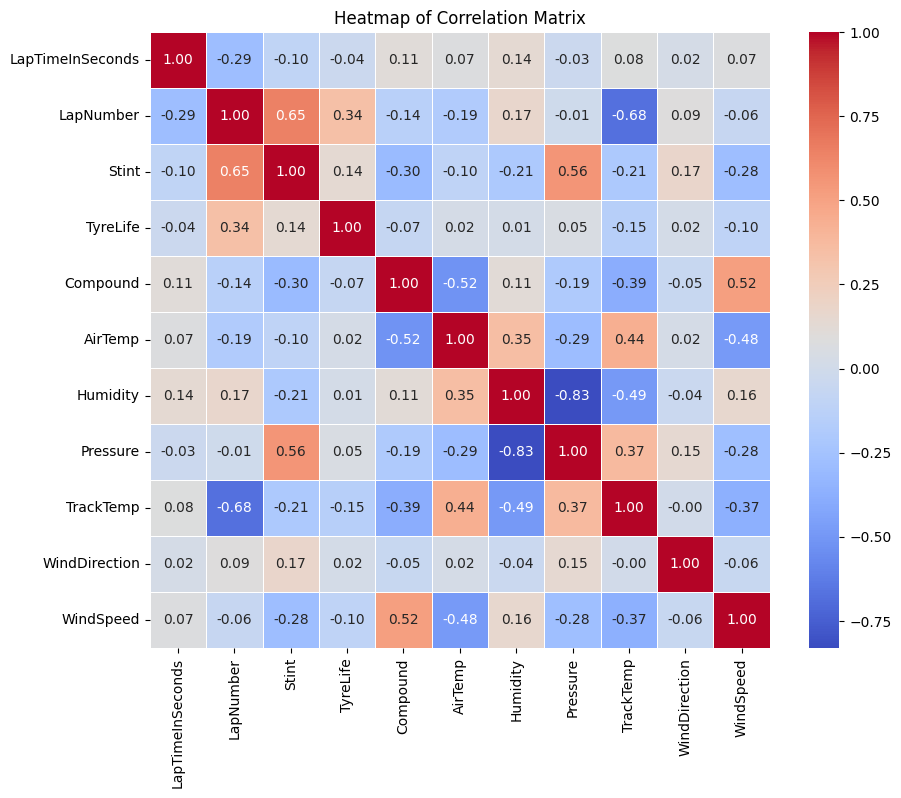

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

params = data[['LapTimeInSeconds', 'LapNumber', 'Stint','TyreLife', 'Compound', 'AirTemp', 'Humidity', 'Pressure', 'TrackTemp', 'WindDirection', 'WindSpeed']]

corr_matrix = params.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Display the plot
plt.title("Heatmap of Correlation Matrix")
plt.show()

      FormattedLapTime  LapTimeInSeconds
0             1:24:591            84.591
1             1:23:795            83.795
2             1:23:635            83.635
3             1:23:402            83.402
4             1:23:408            83.408
...                ...               ...
19309         1:47:269           107.269
19310         1:47:060           107.060
19311         1:47:488           107.488
19312         1:47:547           107.547
19313         1:47:258           107.258

[19314 rows x 2 columns]


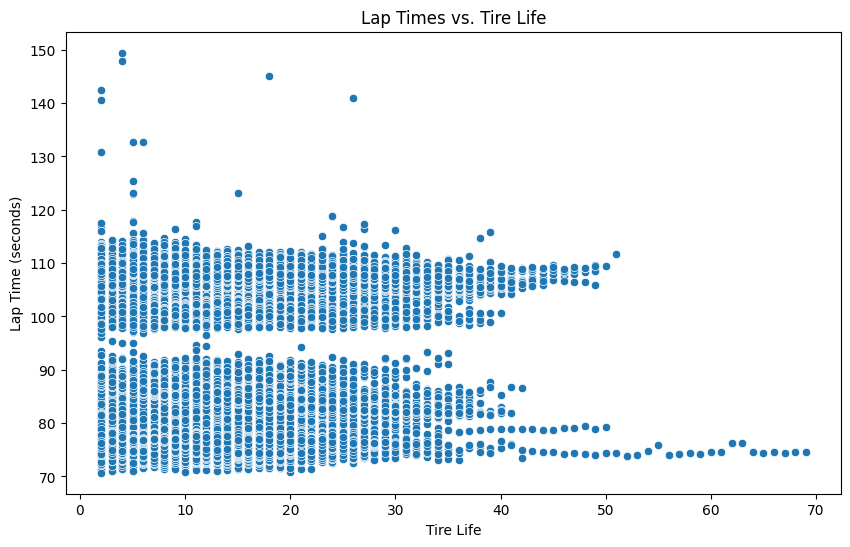

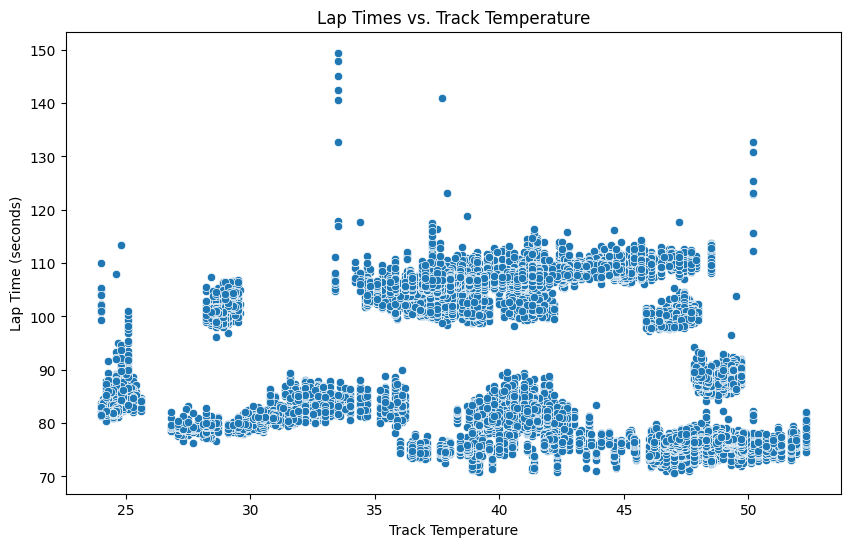

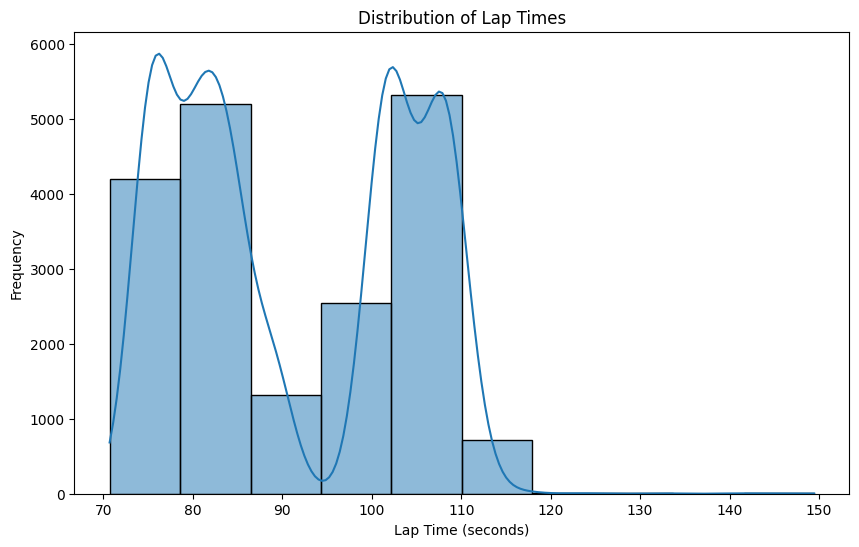

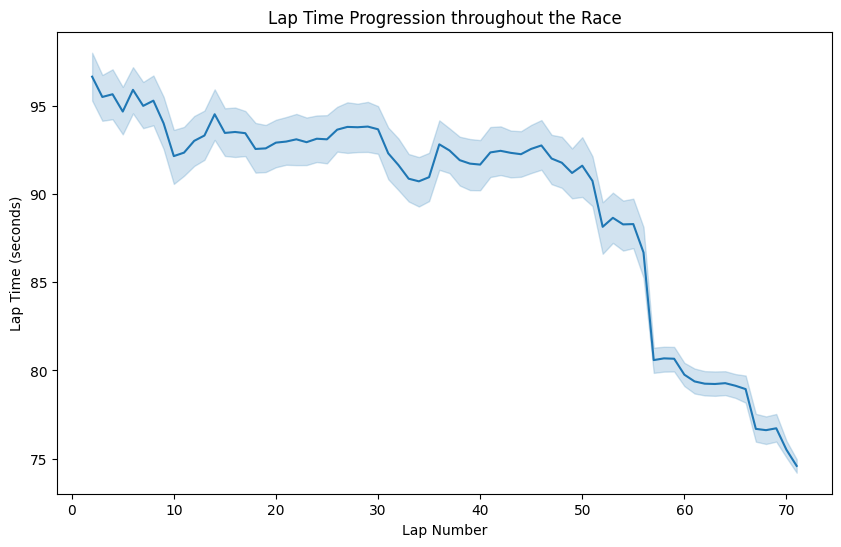

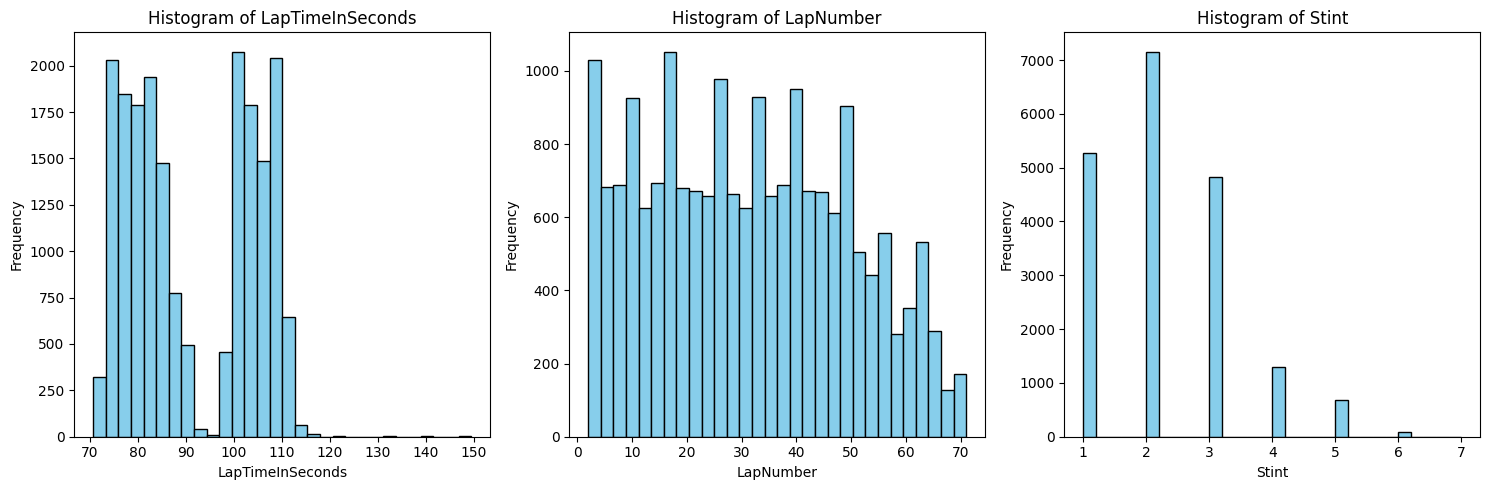

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('updated_file.csv')

# Function to convert FormattedLapTime into seconds
def convert_lap_time_to_seconds(lap_time):
    minutes, seconds, milliseconds = lap_time.split(':')
    total_seconds = int(minutes) * 60 + int(seconds) + int(milliseconds) / 1000
    return total_seconds

# Apply the conversion to the 'FormattedLapTime' column
data['LapTimeInSeconds'] = data['FormattedLapTime'].apply(convert_lap_time_to_seconds)

# Display the result to confirm the conversion
print(data[['FormattedLapTime', 'LapTimeInSeconds']])

# Ensure that 'LapTimeInSeconds' exists in the DataFrame before plotting

# 1. Scatter plot: Lap Times vs. Tire Life
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TyreLife', y='LapTimeInSeconds', data=data)
plt.title('Lap Times vs. Tire Life')
plt.xlabel('Tire Life')
plt.ylabel('Lap Time (seconds)')
plt.show()

# 2. Scatter plot: Lap Times vs. Track Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TrackTemp', y='LapTimeInSeconds', data=data)
plt.title('Lap Times vs. Track Temperature')
plt.xlabel('Track Temperature')
plt.ylabel('Lap Time (seconds)')
plt.show()

# 3. Histogram for Lap Times
plt.figure(figsize=(10, 6))
sns.histplot(data['LapTimeInSeconds'], bins=10, kde=True)
plt.title('Distribution of Lap Times')
plt.xlabel('Lap Time (seconds)')
plt.ylabel('Frequency')
plt.show()

# 4. Line plot: Lap Time Progression throughout the Race
plt.figure(figsize=(10, 6))
sns.lineplot(x='LapNumber', y='LapTimeInSeconds', data=data)
plt.title('Lap Time Progression throughout the Race')
plt.xlabel('Lap Number')
plt.ylabel('Lap Time (seconds)')
plt.show()

key_columns = ['LapTimeInSeconds', 'LapNumber', 'Stint']

# Plot histograms for each key variable
plt.figure(figsize=(15, 5))

for i, column in enumerate(key_columns, 1):
    plt.subplot(1, len(key_columns), i)
    plt.hist(data[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()